First few rows of the dataset:
   Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6

Summary statistics for numerical columns:
         Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000


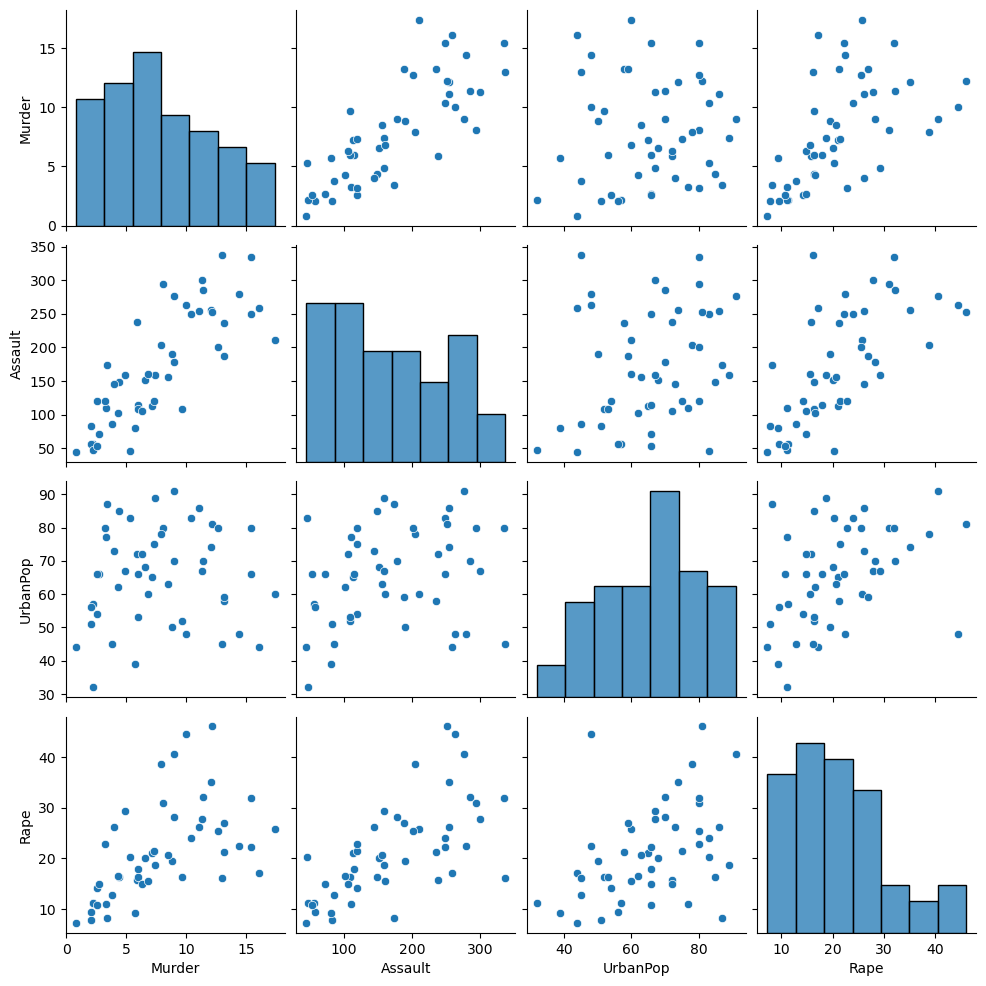

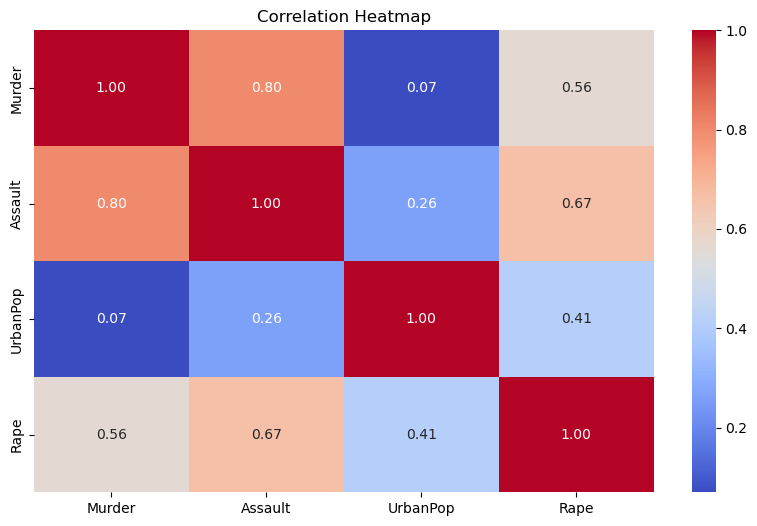

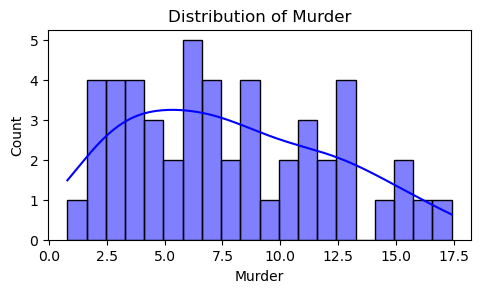

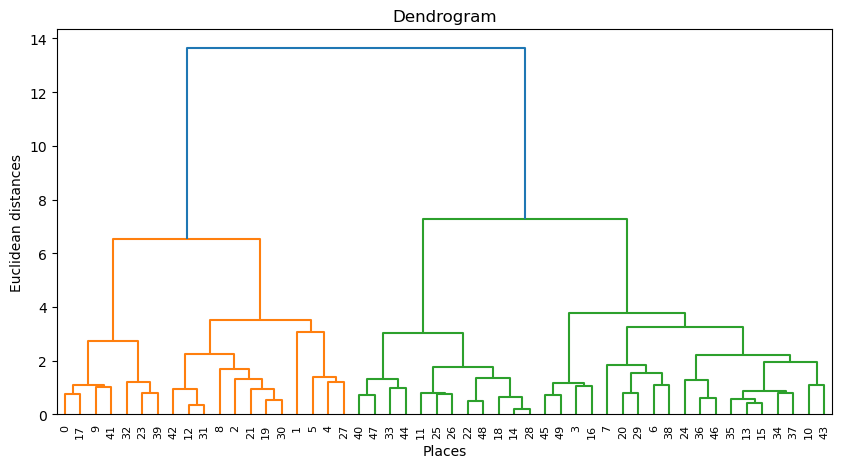

C:\Users\dhruv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dhruv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dhruv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dhruv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

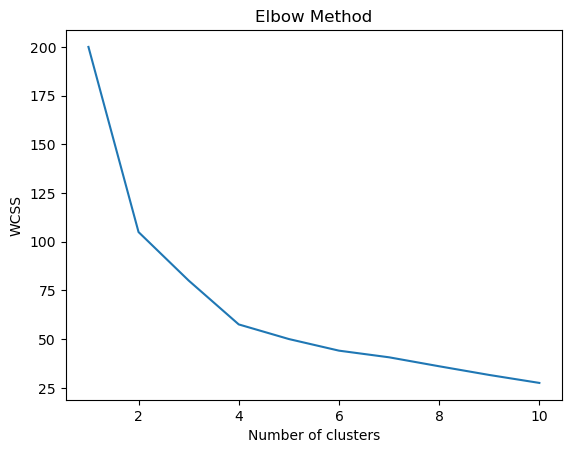

C:\Users\dhruv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dhruv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


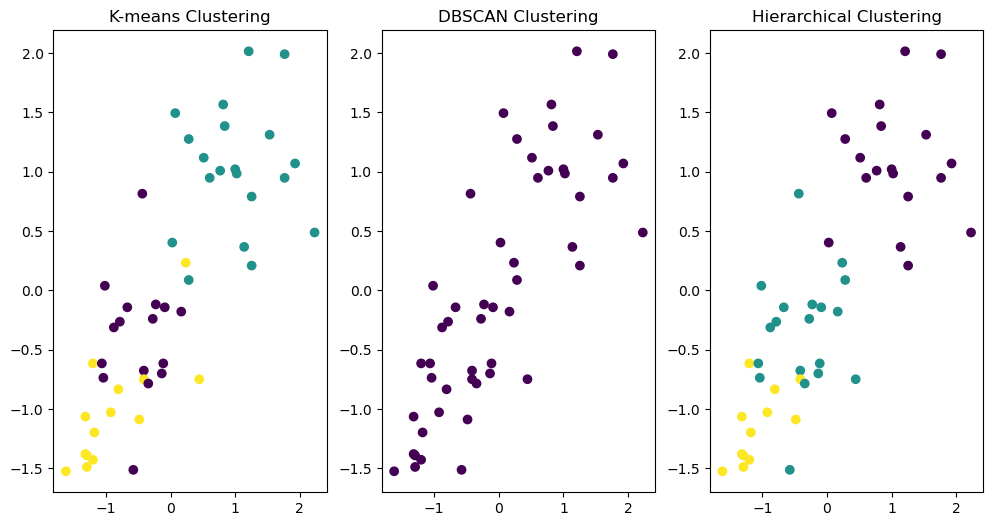

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch


# Step 1: Load the Dataset
crime_data = pd.read_csv("D:\\assignments\\crime_data.csv")  # Replace "crime_data.csv" with your dataset filename
crime_data
# Step 2: Data Preprocessing
# Check for missing values and handle categorical variables if any

# Step 2: Explore the Dataset
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(crime_data.head())

# Step 3: Summary Statistics
# Display summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(crime_data.describe())

# Step 4: Data Visualization
# Pairplot for visualizing relationships between numerical variables
sns.pairplot(crime_data.iloc[:, 1:])
plt.show()

# Step 5: Correlation Heatmap
# Correlation heatmap to identify relationships between variables
correlation_matrix = crime_data.iloc[:, 1:].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Step 6: Distribution of Crimes
# Distribution of each crime type
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(crime_data['Murder'], kde=True, bins=20, color='blue')
plt.title('Distribution of Murder')

# Step 3: Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(crime_data.iloc[:, 1:])  # Exclude the 'place' column from scaling

# Step 4: Hierarchical Clustering
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Places')
plt.ylabel('Euclidean distances')
plt.show()

# Step 5: K-means Clustering
# Using the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# From the Elbow Method, we determine the optimal number of clusters (let's say k=3)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_clusters = kmeans.fit_predict(scaled_data)

# Step 6: DBSCAN Clustering
# Tuning hyperparameters epsilon and min_samples
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(scaled_data)
dbscan_clusters
# Step 7: Visualize the Clusters
# Visualize the clusters formed by each algorithm
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_clusters, cmap='viridis')
plt.title('K-means Clustering')

plt.subplot(1, 3, 2)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_clusters, cmap='viridis')
plt.title('DBSCAN Clustering')

plt.subplot(1, 3, 3)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=AgglomerativeClustering(n_clusters=3).fit_predict(scaled_data), cmap='viridis')
plt.title('Hierarchical Clustering')

plt.show()


